### PSC 204a	Fall 2015	Homework \#3
#### John Karasinski

#### 1) What is the formula for SE? What is the relation of SE with SD?  How are these two measures similar, how are they different?.

The standard error of the mean is the standard deviation of the sample-mean's estimate of a population mean:
$$\text{SE} = \frac{s}{\sqrt{n}}$$

where $s$ is the sample standard deviation (i.e., the sample-based estimate of the standard deviation of the population), and
$n$ is the size (number of observations) of the sample.

This estimate may be compared with the formula for the true standard deviation of the sample mean:
$$\text{SD} = \frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the standard deviation of the population.

These two values both measure the same thing--how spread out the distribution is. The only difference between the quantities is that SD is a parameter of the population distribution (a true value), while the SE is a statistic which measures the textent to which a sample departs from an expectation value.

#### 2 ) All things being equal, what factors influence power? Why does it make sense that these factors influence power? Use the t-test formula to help explain why these factors logically influence power.

As sample size increases, population variances decrease, and the true mean difference increases, power should increase.

The t-test formula,

$$t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}},$$

has each of these factors, where $\mu_0$ is the population mean, $s$ is the sample standard deviation, and $n$ is the sample size. The value of t can be maximized by minimizing $\mu_0$, minimizing $s$, and maximizing $n$. While $s \neq  \sigma$, the population variance, we do assume that it approximates the population variance as $n$ increases. As such, we can see how each of these factors logically increases the power of the t-test.

#### 3) Describe in your own words how z- and t-distributions are used to test null hypotheses. That is, what does the distribution represent, and how do qualities of the distribution help us evaluate differences between means?

The z- and t-distributions are both used to test null hypothesis. The z distribution is simply the normal/guassian distribution, while the t distribution is similar to the normal, and approaches it as $\lim_{df\to\infty}$. The area under the curve of the distribution can tell us the probability that the difference between means is statistically significant. The qualities of the distributions are well known, and a rejection region can be chosen to reject or accept a null hypothesis. The probability of finding a difference between the means can be calculated using the distribution, and is then compared with the chosen rejection region. If this value is found outside the acceptance region, the result is deemed to be unlikely, and the null hypothesis is rejected.

#### 4) A researcher collected three large samples (N = 3,000 each) of undergraduate students from UC Davis, UC Merced, and UC Los Angeles; davis, merced, and la, respectively. The collective wisdom is that anxiety levels between campuses follow a normal distribution, but that some schools may elicit more or less anxiety in their undergraduate population. Your task is to compare these samples using independent samples t-tests. Specifically:

#### a. Gather mean, median, and SD summary statistics about these samples. Table your results. Using these summary statistics, does there appear to be a difference between campuses with respect to undergraduate anxiety?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('HW03data.csv')

In [2]:
res = pd.concat([df.mean(), df.median(), df.std()], axis=1)
res.columns = ['mean', 'median', 'std']
print(res)

                mean    median       std
davis  -4.222548e-17 -0.570450  1.749166
merced  5.036197e-04 -0.014975  1.596463
la     -5.037391e-03 -0.027617  1.749166


Based off these statistics, it appears that there are a few differences between the campuses. While the means of all three campuses are approximately zero, the median anxiety of the UCD students is very nonzero. This suggests that the distribution of UCD responses may be skewed. Aside from this, the standard deviation of the UCD and UCLA campuses is the same, the UC Merced value is slightly smaller. This suggests that the UC Merced students' anxiety is more clustered around the mean. 

#### b. Conduct independent samples t-tests comparing each campus to the other. In a paragraph, summarize the results of the t-tests using APA format. You should report the statistical tests, interpret their meaning, and report your conclusions with respect to the research question. 
#### * In addition to APA formatted reporting of the t-test results, please include the 95% CI for each test. **Note: For those of you with more statistical experience do not worry about inflated type I error rates due to multiple t-tests; we’ll address this later in the quarter.

In [3]:
from scipy.stats import ttest_ind

def test(c1, c2):
    c1_anxiety = df[c1]
    c2_anxiety = df[c2]
    ttest = ttest_ind(c1_anxiety, c2_anxiety)
    
    md = c1_anxiety.mean() - c2_anxiety.mean()
    se = (c1_anxiety.var()/len(c1_anxiety) + c2_anxiety.var()/len(c2_anxiety)) ** 0.5
    low_95, high_95 = md - 1.96 * se, md + 1.96 * se
    
    res = {'campus1': c1.title(), 'm1': c1_anxiety.mean(), 'sd1': c1_anxiety.std(), 'n1': len(c1_anxiety),
           'campus2': c2.title(), 'm2': c2_anxiety.mean(), 'sd2': c2_anxiety.std(), 'n2': len(c2_anxiety),
           'tstatistic': ttest.statistic, 'p': ttest.pvalue,
           'low_95': low_95, 'high_95': high_95,
           'tn': len(c1_anxiety) + len(c2_anxiety) - 2}

    print('The students from UC {campus1} (M = {m1:.2f}, SD = {sd1:.2f}, N = {n1:.0f}) were as anxious '
          'than the students from UC {campus2} (M = {m2:.2f}, SD = {sd2:.2f}, N = {n2:.0f}), '
          't({tn:.0f}) = {tstatistic:.2f}, p < {p:.3f}, two-tailed. The 95% confidence interval around the '
          'difference between group means was ({low_95:.2f} to {high_95:.2f}).'.format(**res), end=' ')
    
test('davis', 'la')
test('davis', 'merced')
test('la', 'merced')

The students from UC Davis (M = -0.00, SD = 1.75, N = 3000) were as anxious than the students from UC La (M = -0.01, SD = 1.75, N = 3000), t(5998) = 0.11, p < 0.911, two-tailed. The 95% confidence interval around the difference between group means was (-0.08 to 0.09). The students from UC Davis (M = -0.00, SD = 1.75, N = 3000) were as anxious than the students from UC Merced (M = 0.00, SD = 1.60, N = 3000), t(5998) = -0.01, p < 0.991, two-tailed. The 95% confidence interval around the difference between group means was (-0.09 to 0.08). The students from UC La (M = -0.01, SD = 1.75, N = 3000) were as anxious than the students from UC Merced (M = 0.00, SD = 1.60, N = 3000), t(5998) = -0.13, p < 0.898, two-tailed. The 95% confidence interval around the difference between group means was (-0.09 to 0.08). 

According to multiple t-tests, the mean anxiety for all three campuses is statistically the same. Despite this, the distributions for the three campuses is quite different, and all three are non-guassian.

#### 5)   It’s useful to include a figure that depicts variable differences between groups. In this situation, there were two expectations: 1. that the average amount of anxiety differed between groups, and 2. that the distribution of student anxiety for each campus is normally distributed. To depict this create a single figure with 3 panels (3 rows and 1 column). Each panel should be a plot of the density of student anxiety. Make sure you generate a main heading, and x- and y-axis labels. Also, each of your final figures should have the same x-axis range and a dotted vertical line at the mean of each sample; this will help visualize comparisons between the campuses. Describe these distributions with respect to the two expectations in this study and your t-test results.

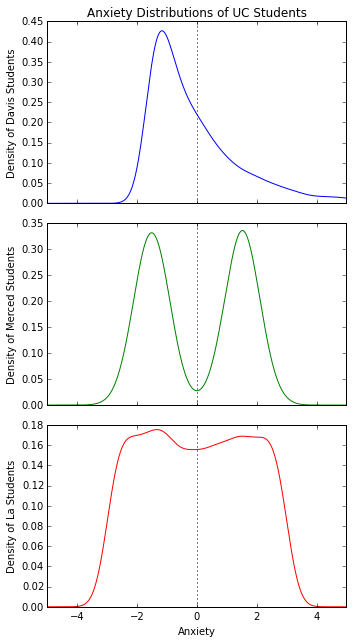

In [4]:
# Create the density plots
axs = df.plot(kind='kde',
              subplots=True, layout=(3, 1),
              figsize=(5, 9),
              xlim=(-5, 5),
              legend=False)[:, 0]

for i, col in enumerate(df):
    # Draw a verticle line at the means
    axs[i].axvline(df[col].mean(), color='k', linestyle='dotted')
    
    # Create some ylabels
    axs[i].set_ylabel('Density of {} Students'.format(col.title()))

# Set a title
axs[0].set_title('Anxiety Distributions of UC Students')
    
# Add a title
plt.xlabel('Anxiety')
plt.tight_layout()
plt.show()

Despite their means being very close to zero, the distributions for each of the three campuses are very different and very non-gausssian. Davis students, for instance, belong to an extremely positively skewed distribution. The median for Davis students is relatively far to the left, unlike Merced and LA students. Merced and LA students feature bimodal distributions. Merced students are extremely bimodal, such that the distribution appears to be a combination of two guassian distributions. Half the students appear to be extremely anxious, while other half appear to not be anxious at all. LA students also feature a bimodal distribution, though it appears to be much more flat than the distribution of the Merced students. Of the three campuses, LA appears to be the most gaussian, though that term only barely applies.

As such, the collective wisdom about anxiety levels appears to be false, despite the fact that none of our t-tests failed their null hypotheses.